In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Helper Functions


In [21]:
def vcol(vec):
    return vec.reshape(-1, 1)


def vrow(vec):
    return vec.reshape(1, -1)

# Multivariate Gaussian Density


$\log \mathcal{N}(\boldsymbol{x} \mid \boldsymbol{\mu}, \boldsymbol{\Sigma})=-\frac{M}{2} \log 2 \pi-\frac{1}{2} \log |\boldsymbol{\Sigma}|-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})$


In [56]:
def logpdf_GAU_ND(X, mu, C):
    # inv_C = np.linalg.inv(C)
    # result = np.empty(X.shape[1])
    # for i in range(X.shape[1]):
    #     diff = X[:, i] - mu
    #     result[i] = (diff.T @ inv_C @ diff).item()

    return -0.5 * (
        X.shape[0] * np.log(2 * np.pi)
        + np.linalg.slogdet(C)[1]
        # einsum is equivalent to the for loop above but faster
        + np.einsum("ij,ji->i", np.dot((X - mu).T, np.linalg.inv(C)), (X - mu))
        # + result
    )

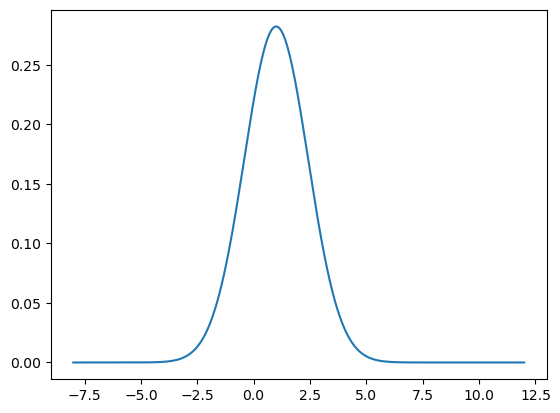

In [57]:
plt.figure()
XPlot = np.linspace(-8, 12, 1000)
m = np.ones((1, 1)) * 1.0
C = np.ones((1, 1)) * 2.0
plt.plot(XPlot.ravel(), np.exp(logpdf_GAU_ND(vrow(XPlot), m, C)))
plt.show()

## Compare with llGAU


In [28]:
pdfSol = np.load("solutions/llGAU.npy")
pdfGau = logpdf_GAU_ND(vrow(XPlot), m, C)
assert np.abs(pdfSol - pdfGau).max() < 1e-10

## Compare with XND


In [30]:
XND = np.load("solutions/XND.npy")
mu = np.load("solutions/muND.npy")
C = np.load("solutions/CND.npy")
pdfSol = np.load("solutions/llND.npy")
pdfGau = logpdf_GAU_ND(XND, mu, C)
assert np.abs(pdfSol - pdfGau).max() < 1e-10

# Maximum Likelihood Estimate


$\boldsymbol{\mu}_{M L}=\frac{1}{N} \sum_{i=1}^N x_i, \quad \Sigma_{M L}=\frac{1}{N} \sum_{i=1}^N\left(\boldsymbol{x}_i-\boldsymbol{\mu}\right)\left(\boldsymbol{x}_i-\boldsymbol{\mu}\right)^T$


## Log Likelihood


In [33]:
def log_likelihood_GAU_ND(X, mu, C):
    return np.sum(logpdf_GAU_ND(X, mu, C))

## Test the log likelihood


In [55]:
mu = np.mean(XND, axis=1).reshape(-1, 1)
C = np.array(np.cov(XND, bias=True), ndmin=2)

print(mu)
print(C)

[[-0.07187197]
 [ 0.05979594]]
[[0.94590166 0.09313534]
 [0.09313534 0.8229693 ]]


In [52]:
ll = log_likelihood_GAU_ND(XND, mu, C)
print(ll)

-270.70478023795044


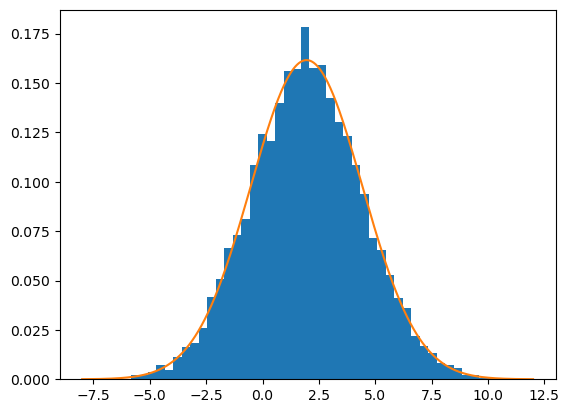

In [60]:
X1D = np.load("solutions/X1D.npy")

mu = np.mean(X1D, axis=1).reshape(-1, 1)
C = np.array(np.var(X1D), ndmin=2)

plt.figure()
plt.hist(X1D.ravel(), bins=50, density=True)
plt.plot(XPlot.ravel(), np.exp(logpdf_GAU_ND(vrow(XPlot), mu, C)))

In [61]:
ll = log_likelihood_GAU_ND(X1D, mu, C)
print(ll)

-23227.07765460272
